# Assignment 3

This assignment is meant to help you familiarize yourself with basic **Prediction**.

To receive credit, answer all questions correctly and submit to Canvas before the deadline.

**This assignment is due Thursday, April 29 at 11:59 PM.**

**NOTE: All instructions deserve 0 point. However, -5 for each part if you do not follow, run, and understand.**

**YOUR FULL NAME (1 POINT)**: Nazim Zerrouki

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the assignment, we ask that you **write your solutions individually**. If you do discuss the assignment with others, please **include their names** below.

**Collaborators**: Xiuxiang Wu

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Part I: Modeling and Loss Functions

In this section, you will:

1. Define loss functions and find the arguments that minimize them.
2. Explore different statistics and techniques.

## Constant Model

In the modeling context, $y$ represents our "true observations", which are typically what we are trying to model. $\hat{y}$ represents our prediction (for any model). First, we explore the constant model, where our prediction for any input is a constant:

$$\Large
\hat{y} = \theta
$$

$\theta$ is what we call a **parameter**. Our goal is to find the value of our parameters that **best fit our data**. We represent the optimal parameter(s) with $\hat{\theta}$.

We call the constant model a **summary statistic**, as we are determining one number that best "summarizes" a set of values.


## Loss function

Loss functions are what we use to determine the optimal parameter(s) for our model.

A loss function is a measure of how well a model is able to predict the expected outcome. In other words, it measures the deviations of the predicted values from the observed values. We will implement the squared loss and absolute loss functions.  

In the formulations below $y$ represents the observed values and $\hat{y}$ stands for our prediction.

1. **Squared Loss** (also known as the $L_2$ loss, pronounced "ell-two"):

$$\Large L(y, \hat{y}) = (y - \hat{y})^2$$

2. **Absolute Loss** (also known as the $L_1$ loss, pronounced "ell-one"):

$$\Large L\left(y, \hat{y} \right) = \left| y - \hat{y} \right|$$

Since we are using the constant model $\hat{y} = \theta$, we will instead refer to these loss functions as being $(y - \theta)^2$ and $|y - \theta|$.

## Question 1.a (2 points)

Based on the comments below, implement the squared loss function. **Your answer should not use any loops**.



In [2]:
def squared_loss(y_obs, theta):
    """
    Calculate the squared loss of the observed data and a summary statistic.
    
    Parameters
    ------------
    y_obs: an observed value
    theta : some constant representing a summary statistic
    
    Returns
    ------------
    The squared loss between the observation and the summary statistic.
    """
    # type your code here
    np_obs = y_obs * np.zeros((theta.shape))
    return np.subtract(y_obs, theta) ** 2

## Question 1.b (3 points)

Plotting the Squared Loss: Let us now consider the case where `y_obs` equals 10. For arbitrary values of `theta`, plot the squared loss using the function above.

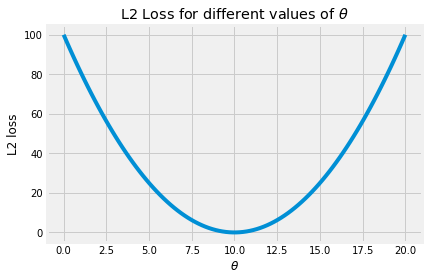

In [3]:
y_obs = 10
theta_values = np.linspace(0, 20, 100) # some arbitrary values of theta
# type your code here
plt.plot(theta_values, squared_loss(y_obs, theta_values))
plt.xlabel(r'$\theta$')
plt.ylabel('L2 loss')
plt.title(r'L2 Loss for different values of $\theta$'); # Do not want to show an additional line of Text, use ";"

## Mean Squared Error for the `Tips` Data

Let's apply our knowledge to some real world data. In this section, you will try to find the best statistic $\theta$ to represent the tips given in an array. The simple procedure you will use includes constructing the mean squared error (MSE) for the `tips` data and finding the value that minimizes the MSE. Below you are given an array of tips from a restaurant.





In [4]:
# Run this cell, do not change anything
df = sns.load_dataset("tips")
tips = np.array(df['tip']) # array of observed tips

## Question 1.c (4 points)

Now, we can extend the above loss function to an entire dataset by taking the average. Let the dataset $\mathcal{D}$ be the set of observations:

$$\Large\mathcal{D} = \{y_1, \ldots, y_n\}$$

where $y_i$ is the $i^{th}$ tip.

We can define the average loss over the dataset as:

$$\Large
R\left(\theta\right) = \frac{1}{n} \sum_{i=1}^n L(y_i, \theta)
$$

Define the `mean_squared_error` function which computes the mean squared error given the data and a value for `theta`. Assume that `data` will be a numpy array. **You do NOT need to use the `squared_loss` function in 1.a. Your answer should not use any loops.**

In [5]:
def mean_squared_error(theta, data):
    # type your code here
    return np.mean(np.subtract(data, theta) ** 2) 

mean_squared_error(5.3, tips)

7.20452950819672

In the cell below  we will plot the mean squared error for different theta values.

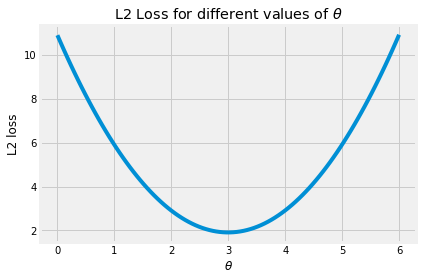

In [6]:
theta_values = np.linspace(0, 6, 100)
mse = [mean_squared_error(theta, tips) for theta in theta_values]
plt.plot(theta_values, mse)
plt.xlabel(r'$\theta$')
plt.ylabel('L2 loss')
plt.title(r'L2 Loss for different values of $\theta$');

## Question 1.d (1 point)

From the above plot, what is the value of `theta` that minimizes the L2 loss. **Round your answer to the nearest integer.**

In [7]:
mse_observed_theta = 3 # type your answer here
mse_observed_theta

3

## How to find the exact value of `theta` that minimizes the loss?

The cell below plots some arbitrary 4th degree polynomial function. 



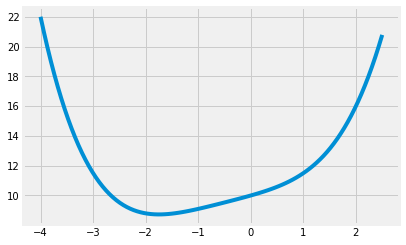

In [8]:
x_values = np.linspace(-4, 2.5, 100)

def fx(x):
    return 0.1 * x**4 + 0.2 * x**3 + 0.2 * x**2 + 1 * x + 10

plt.plot(x_values, fx(x_values));

By looking at the plot, we see that the x which minimizes the function is slightly larger than -2. What if we want the exact value? We will demonstrate grabbing the minimum value and the optimal `x` in the following cell.

The function `minimize` from [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) will attempt to minimize any function you throw at it.

Try running the cell below, and you will see that `minimize` seems to get the answer correct.

In [9]:
from scipy.optimize import minimize
minimize(fx, x0 = 1.1)

      fun: 8.728505719866614
 hess_inv: array([[0.50884886]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-1.74682779])

The `fun` value is the minimum value of the function. The `x` is the x which minimizes the function. We can index into the object returned by `minimize` to get these values. We have to add the additional `[0]` at the end because the minimizing x is returned as an array, but this is not necessarily the case for other attributes (i.e. `fun`). The reason for this is that `minimize` can also minimize multivariable functions.

In [10]:
minimization_result_for_fx = minimize(fx, x0 = 0)
min_of_fx = minimization_result_for_fx['fun']
x_which_minimizes_fx = minimization_result_for_fx['x'][0]
min_of_fx, x_which_minimizes_fx

(8.728505719868085, -1.7468265839690909)

The parameter `x0` that we passed to the `minimize` function is where the `minimize` function starts looking as it tries to find the minimum. For example, above, `minimize` started its search at x = 1.1 because that's where we told it to start. For the function above, it doesn't really matter what x we start at because the function is nice and has only a single local minimum. More technically, the function is nice because it is [convex](https://en.wikipedia.org/wiki/Convex_function).

`minimize` isn't perfect. For example, if we give it a function with many valleys (also known as local minima) it can get stuck. For example, consider the function below:

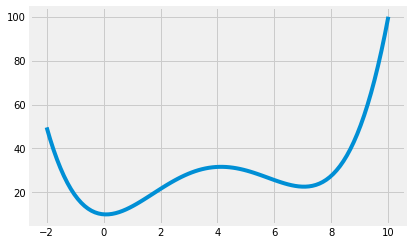

In [11]:
w_values = np.linspace(-2, 10, 100)

def fw(w):
    return 0.1 * w**4 - 1.5*w**3 + 6 * w **2 - 1 * w + 10

plt.plot(w_values, fw(w_values));

If we start the minimization at w = 6.5, we'll get stuck in the local minimum at w = 7.03. Note that no matter what your actual variable is called in your function, the `minimize` routine still calls the starting point `x0`.

In [12]:
minimize(fw, x0 = 6.5)

      fun: 22.594302881719713
 hess_inv: array([[0.12308018]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([7.03774624])

## Question 1.e (5 points)

Using the `minimize` function, find the value of `theta` that minimizes the mean squared error for our tips dataset. In other words, you want to find the exact minimum of the plot that you saw in question 1.c.

Assign `min_scipy` to the value of `theta` that minimizes the MSE according to the `minimize` function.

Hint: You can't pass your `mean_squared_error` function to `minimize` because `mean_squared_error` has two variables: `theta` and `data`. `minimize` will get confused because it thinks it needs to minimize by picking the best `theta` and best `data` values. We only want it to play around with `theta`.

In other words, you need to pass a function of one variable `theta` to the `minimize` function, which means you'll need to create a new function of only ONE variable `theta`. This is very simple, but also very tricky when you do this for the first time. Make sure to ask for help if you get stuck.

In [13]:
# define your function here
def f_theta(theta, data=tips):
  return np.mean(np.array([(theta - data) ** 2]))
# use the following code to minimize
min_scipy = minimize(f_theta, x0=0.0)['x'][0] 

min_scipy

2.9982787346405537

## Question 1.f (2 points)

From lecture we know that the value of `theta` that minimizes the mean squared error is the average of the data for the constant model. Assign `min_computed` to the mean of the tips dataset, and compare this to the values you observed in questions 1.d and 1.e.

In [14]:
min_computed = np.mean(tips) # type your code here
min_computed

2.99827868852459

The reason these don't match past the first 5 decimal places is due to the fact that `scipy.minimize` is a numerical method, meaning it approximates the optimal value using some sort of iterative procedure. You shouldn't worry about the tiny differences in solutions from different runs of `minimize`.

In summary, we've now seen 3 ways to find the summary statistic `theta` that minimizes the mean squared error:
1. Create a plot of the MSE for the given data array vs. `theta` and eyeball the minimizing `theta`.
2. Create a function that returns the MSE for a specific data array as a function of `theta` and use the scipy `minimize` function to find the exact `theta` which minimizes this function.
3. Simply compute the `mean` of the data array.

At this point, you've hopefully convinced yourself that the `mean` of the data is the summary statistic that minimizes mean squared error.

##  Mean Absolute Error

In this section, you will follow the same steps as above but for the absolute loss function. Absolute loss is defined as:

$$\Large
L\left(y, \theta \right) = \left| y - \theta \right|
$$

## Question 1.g (2 points)

In the cell below, define the function `abs_loss` which returns the absolute loss given a value of `theta` and `y_obs`. 

In [15]:
def abs_loss(theta, y_obs):
    # type your code here
    return abs(y_obs - theta)

In the cell below, we will plot the absolute loss for different values of `theta` given that `y_obs = 10`.

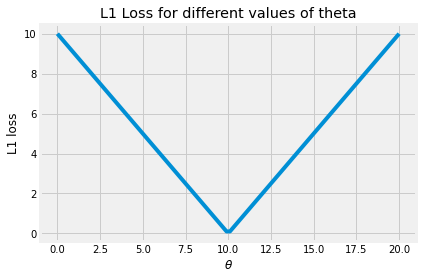

In [16]:
y_obs = 10
theta_values = np.linspace(0, 20, 100) # some arbitrary values of theta
plt.plot(theta_values, abs_loss(theta_values, y_obs))
plt.xlabel(r'$\theta$')
plt.ylabel('L1 loss')
plt.title('L1 Loss for different values of theta');

## Mean Absolute Error for the `Tips` Data

## Question 1.h (4 points)

Define the `mean_absolute_error` function which computes the mean absolute error (MAE) given the data and a value for `theta`. Assume that `data` will be a numpy array. **You do NOT need to use the `abs_loss` function in 1.g. Your answer should not use any loops.**

In [17]:
def mean_absolute_error(theta, data):
    # type your code here
    return np.mean(abs(theta - data))

mean_absolute_error(5.3, tips)

2.4527868852459016

We will plot the mean absolute error for different theta values on the tips dataset.

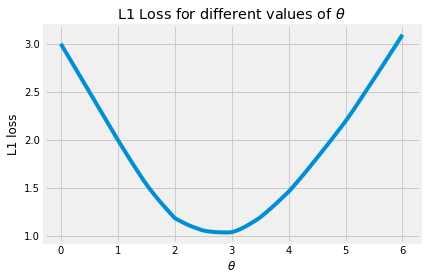

In [18]:
theta_values = np.linspace(0, 6, 100)
mae = [mean_absolute_error(theta, tips) for theta in theta_values]
plt.plot(theta_values, mae)
plt.xlabel(r'$\theta$')
plt.ylabel('L1 loss')
plt.title(r'L1 Loss for different values of $\theta$');

You should see that the plot looks somewhat similar to the plot of the mean squared error. Try to identify any key differences you observe and write them down below. This might be more fun with a partner. Note, your answer will not be graded, so don't worry about writing a detailed answer. 

**Note: 0 point, -5 if you do not answer**

*The first graph is not parabolic, it has a symmetric linear shape in which the left shape of the graph is the inverse of the right shape of the graph. This is because we are computing the absolute value._*

*The second graph is very similar once we take the average. The only difference is that it is not perfectly symmetrical.*

To minimize the function, let's zoom in closer to the minimizing `theta`. We will plot the mean absolute error again using the given `theta_values` below.

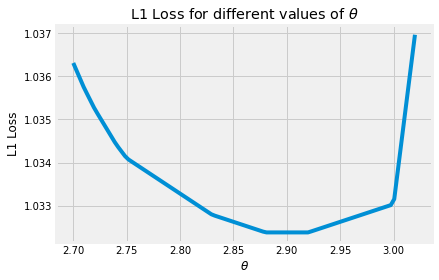

In [19]:
theta_values = np.linspace(2.7, 3.02, 100)
mae = [mean_absolute_error(theta, tips) for theta in theta_values]
plt.plot(theta_values, mae)
plt.xlabel(r'$\theta$')
plt.ylabel('L1 Loss')
plt.title(r'L1 Loss for different values of $\theta$');

## Question 1.i (1 point)

This time, observe that the function is piecewise linear and has a slope of zero near its minimum. Because of the large flat region at the minimum, there are multiple values of `theta` that minimize the L1 loss.

Give a `theta` rounded to the nearest tenth that minimizes L1 loss. By "rounded to the nearest tenth" we mean you'd say 7.6 instead of 7.55.

In [20]:
mae_observed_theta = 2.9 # type your observation here
mae_observed_theta

2.9

## Question 1.j (5 points)

As before, we will use the `minimize` function to find a solution. Note that we will be minimizing the mean absolute error for our tips dataset. Assign `min_abs_scipy` to the value of `theta` that minimizes the MAE according to the `minimize` function for the `tips` data. Note: Depending on the `x0` value you specify, you will get different results! 

Extra: Try various `x0` values and record the different outputs you get from `minimize`. Use the plot you created above to verify that these are all valid minimizing statistics.

In [21]:
# define your function here
def f_theta(theta, data=tips):
  return np.mean(np.array([abs((np.subtract(data, theta)))])) 
# use the code below to minimize
min_abs_scipy = minimize(f_theta, x0=0.0)['x'][0]

min_abs_scipy

2.891549525263021

Just like the MSE, there are three ways to compute the summary statistic `theta` that minimizes the MAE:
1. Create a plot of the MAE for the given data array vs. `theta` and eyeball a minimizing `theta`.
2. Create a function that returns the MAE for a specific data array as a function of `theta` and use the scipy `minimize` function to find an exact `theta` which minimizes this function.
3. Simply compute the **??????** of the data array.

Try to figure out what to substitute in for the **??????** above. To this, try out various statistics functions provided by `np`. A list and documentation is available at [https://docs.scipy.org/doc/numpy/reference/routines.statistics.html](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

## Question 1.k (2 points)

Assign `min_abs_computed` to the correct summary statistic using method `#3` outlined above.

In [22]:
min_abs_computed = np.mean(tips) # type your code here
min_abs_computed

2.99827868852459

In summary, you may observe three key differences between the plots of the MSE and MAE.

1. The minimizing $\theta$ is different.
2. The plot for MAE increases linearly instead of quadratically as we move far away from the minimizing $\theta$.
3. The plot for MAE is piecewise linear instead of smooth. Each change in slope happens at the same $\theta$ value as a data point in our dataset.

# Part II: Simple Linear Regression

In this section, we're interested in studying the **relationship between two variables**. Specifically, we're interested in the relationship between the `total_bill` column and `tip` column. Our goal will be to predict tip ($y$) from total_bill ($x$), i.e., we want to find values of $a$ and $b$ so that given $x$, predict $y$ as
$$\boxed{\hat{y} = a + bx}$$
We will now explore different ways to obtain the optimal values of $a, b$, called $\hat{a}, \hat{b}$, where $\hat{y} = \hat{a} + \hat{b}x$.

First, let's run `sns.lmplot`, which will both provide a scatterplot of tip vs total_bill and display the least-squares line of best fit. We will look into solving for the line of best fit in three different ways: manually using the formula from lecture, scipy.optimize, and scikit-learn.

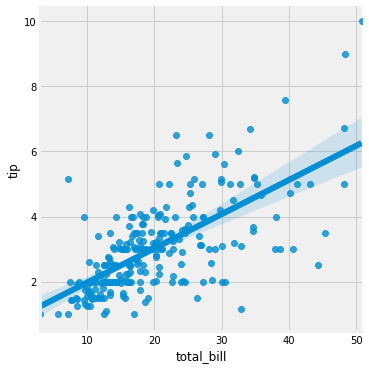

In [23]:
sns.lmplot(data = df, x = "total_bill", y = "tip");

## Analytic Solution

Using slides 36-37 of Lecture 4 and definitions of standard deviation and correlation in Lecture 5, we can derive the following expression for the line of best fit.

$$\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$$

where $\bar{x}$, $\bar{y}$, $SD(x)$, $SD(y)$ correspond to the means and standard deviations of $x$ and $y$, respectively, and $r$ is the correlation coefficient.

## Question 2.a (5 points)

Assign `x_bar`, `y_bar`, `std_x`, `std_y`, and `r`, such that they align with our dataset. Note: Make sure to use `np.std`, and not `<Series name>.std()`.

- Hint: Remember, in our case, `y` is `tip`, and `x` is `total_bill`.
- Hint: You may find `np.corrcoef` handy in computing `r`. Note that the output of `np.corrcoef` is a matrix, not a number, so you'll need to collect the correlation coefficient by indexing into the returned array.

In [24]:
# type your code here
total_bills = df['total_bill']
x_bar = np.mean(total_bills)
y_bar = np.mean(tips)
std_x = np.std(total_bills) # np.sum([np.subtract(x, x_bar) ** 2 for x in total_bills])
std_y = np.std(tips)
r = np.corrcoef(total_bills, tips)[0][1]

x_bar, y_bar, std_x, std_y, r

(19.785942622950824,
 2.99827868852459,
 8.88415057777113,
 1.3807999538298954,
 0.6757341092113641)

## Question 2.b (3 points)

Now, set `b_hat` and `a_hat` correctly, in terms of the variables you defined above. 

- Hint: Try and match the slope and intercept in $\hat{y_i} = \hat{a} + \hat{b}x_i$ to the slope and intercept in $\hat{y_i} = \bar{y} + r \frac{SD(y)}{SD(x)} (x_i - \bar{x})$.

- Hint: You may want to define `a_hat` in terms of `b_hat` as in the lecture 4.


In [25]:
# type your code here
y_hat = y_bar + r * (std_y/std_x) * np.mean(np.array([np.subtract(x, x_bar) for x in total_bills]))
b_hat = np.sum(np.array([(np.subtract(x, x_bar) * np.subtract(y, y_bar)) for x,y in zip(total_bills, tips)])) / np.sum(np.array([np.subtract(x, x_bar) ** 2 for x in total_bills]))
a_hat = y_hat - b_hat * np.mean(np.array([x for x in total_bills])) 

a_hat, b_hat

(0.9202696135546722, 0.1050245173843534)

## Question 2.c (2 points)

Now, use `a_hat` and `b_hat` to predict the tip for a total bill amount of $20. Store your result in `predicted_20`.

In [26]:
predicted_20 = a_hat + b_hat * 20 # type your code here

predicted_20

3.02075996124174

## Question 2.d (1 point)

Assign `regression` to be a `pd.Series` of predicted $y$ values (i.e., predicted `"tip"` values) for the observed total bills (`df["total_bill"]`). You will need to use `a_hat`, `b_hat`, and `df["total_bill"]`.

In [27]:
predicted_values = np.array([a_hat + b_hat * x for x in total_bills])
regression = pd.Series(predicted_values) # type your code here

regression

0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Length: 244, dtype: float64

If you defined `regression` correctly, the following cell will generate a scatter plot of `tip` vs. `total_bill`, along with the line of best fit you just computed.

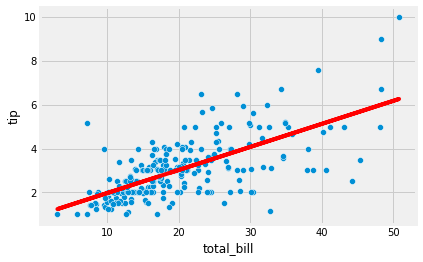

In [28]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.plot(df["total_bill"], regression, color = 'r')
plt.xlabel('total_bill')
plt.ylabel('tip');

## Using Scipy Minimize

`scipy.minimize` is a powerful method that can determine the optimal value of a variety of different functions. In practice, it is used to minimize functions that have no (or difficult to obtain) analytical solutions (it is a **numerical method**).

It is overkill for our simple example, but nonetheless, we will show you how to use it, as it will become useful in your future.

## Question 2.e (6 points)

First, we define the function `l2_tip_risk` which computes the empirical risk for a given choice of `a` and `b`. That is, it computes

$$R(a, b) = \frac{1}{n} \sum_{i = 1}^n(y_i - (a + b x_i))^2$$

where, again, $x$ and $y$ refer to `"total_bill"` and `"tip"`.

For your own purpose of testing, you may try out different `a` and `b` values. Observe that if you pick values close to the ones from the earlier part then the risk is lower. 

In [29]:
def l2_tip_risk(a, b):
    """Returns average l2 loss between regression line for intercept a 
       and slope b"""
    # type your code here
    return np.mean(np.array([(y - (a + b*x)) ** 2 for x,y in zip(total_bills, tips)]))

l2_tip_risk(0.9, 0.1)

1.052336405737705

The `minimize` function can also minimize functions of multiple variables. There's one quirk, however, which is that the function has to accept its parameters as a single list.

For example, consider the multivariate $f(u, v) = u^2 - 2 u v - 3 v + 2 v^2$. It turns out this function's minimum is at $(1.5, 1.5)$. To minimize this function, we create `f`.

In [30]:
def f(theta):
    u = theta[0]
    v = theta[1]
    return u**2 - 2 * u * v - 3 * v + 2 * v**2

In [31]:
from scipy.optimize import minimize
minimize(f, x0 = [0.0, 0.0]) 

# As an aside: x0 is the "initial guess" for the optimal theta. Minimize iteratively updates theta.

      fun: -2.2499999999999947
 hess_inv: array([[0.99999996, 0.49999997],
       [0.49999997, 0.49999999]])
      jac: array([-5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([1.49999991, 1.49999993])

## Question 2.f (2 points)

Define `l2_tip_risk_list` which is exactly like `l2_tip_risk` except that it takes in a single list of 2 variables rather than two separate variables. For example `l2_tip_risk_list([2, 3])` should return the same value as `l2_tip_risk(2, 3)`.

In [32]:
def l2_tip_risk_list(theta):
    """Returns average l2 loss between regression line for intercept a 
       and slope b"""
    # type your code here
    #if len(theta) == 1: return np.sum(np.array([(y - (theta[0] + 0*x)) ** 2 for x,y in zip(total_bills, tips)])) / len(tips)
    return np.mean(np.array([(y - (theta[0] + theta[1]*x)) ** 2 for x,y in zip(total_bills, tips)]))

l2_tip_risk_list([0.9, 0.1])

1.052336405737705

## Question 2.g (4 points)

Now, set `minimized` to the result of calling `minimize` to optimize this risk function.

- Hint: Make sure to set `x0`.

In [33]:
minimized = minimize(l2_tip_risk_list, x0=[0, 0]) # type your code here

minimized

      fun: 1.0360194420114932
 hess_inv: array([[ 2.9799997 , -0.1253415 ],
       [-0.1253415 ,  0.00633488]])
      jac: array([-4.47034836e-08, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.92027035, 0.10502448])

The following cell will print out the values of `a_hat` and `b_hat` computed from both methods ("manual" refers to the technique in Analytic Solution). If you've done everything correctly, these should be very close to one another.

In [34]:
print('a_hat_scipy: ', minimized['x'][0])
print('a_hat_manual: ', a_hat)
print('\n')
print('b_hat_scipy: ', minimized['x'][1])
print('b_hat_manual: ', b_hat)

a_hat_scipy:  0.9202703450693733
a_hat_manual:  0.9202696135546722


b_hat_scipy:  0.10502447914641164
b_hat_manual:  0.1050245173843534


## Using Scikit Learn

Yet another way to fit a linear regression model is to use scikit learn, an industry standard package for machine learning applications. 

To do so, we first create a `LinearRegression` object.

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Here, `model` is like a "blank slate" for a linear model. Now, we need to tell `model` to "fit" itself to the data. Essentially, this is doing exactly what you did in the previous part (creating a risk function and finding the parameters that minimize that risk).

<i>Note: `X` needs to be a matrix (or DataFrame), as opposed to a single array (or Series). This is because `sklearn.linear_model` is robust enough to be used for multiple regression</i>

In [36]:
model.fit(X = df[['total_bill']], y= df['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that the model exists, we can look at the a_hat and b_hat values it found, which are given in the attributes intercept and coef, respectively.

In [37]:
model.coef_, model.intercept_

(array([0.10502452]), 0.9202696135546731)

To use the `scikit-learn` linear regression model to make predictions, you can use the `model.predict` method:

In [38]:
model.predict([[20]]) # 20 needs to be a 2D array since the X above was a 2D array.

array([3.02075996])

The above line of code tells us that `model` predicts a tip of $\$3.02$ given a total bill amount of $\$20$. This is the same as in Question 2.c.

## Question 2.h (3 points)

Create a linear regression plot using `model.predict`. It should look very similar (if not the same) as your plot from Question 2.d.

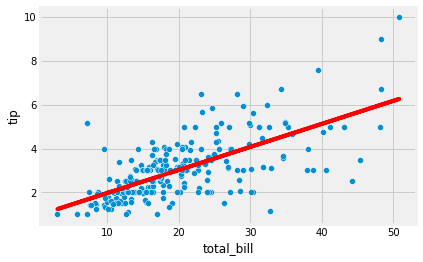

In [39]:
predicted_tip = np.array([model.predict([[x]]) for x in total_bills]) # type your code here
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.plot(df["total_bill"],  predicted_tip, color = 'r');

# Part III: Multiple Linear Regression

First, we need to make sure the sklearn (scikit-learn) package that contains simple and efficient tools for data mining and data analysis is imported. Then, we load a data set from the sklearn.datasets as an example.

In [40]:
import sklearn.datasets as mldata
data_dict = mldata.load_boston()
print(data_dict['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
# translate the data_dict to dataframe and we aim to use all features for the regressor
housing = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names']) 
housing['MEDV'] = data_dict['target'] 
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we can conduct one train-test split.

In [42]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(housing, test_size=0.25, random_state=100)
x_train = train.drop('MEDV', axis=1).values
y_train = train['MEDV'].values
x_test = test.drop('MEDV', axis=1).values
y_test = test['MEDV'].values

print("Training Data Size: ", len(train))
print("Test Data Size: ", len(test))

Training Data Size:  379
Test Data Size:  127


The training data can be used to fit a LinearRegression model as follows.

In [43]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
from sklearn.metrics import mean_squared_error
y_train_pred = linear_model.predict(x_train)
mean_squared_error(y_train, y_train_pred)

20.506781668028975

In [45]:
y_test_pred = linear_model.predict(x_test)
mean_squared_error(y_test, y_test_pred)

27.173144173043553

# Part IV: Classification Big Question

In this question, you are required to use the following data to fit a classification model and evaluate its performance using one train-test split as the multiple linear regression example above.

In [46]:
data_dict = mldata.load_breast_cancer() #load the data
print(data_dict['DESCR']) #Please carefully understand the data

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Question 4.a (3 points)

Translate the data_dict to dataframe, prepare for the target, and use head to show some examples

In [47]:
dataset = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names']) 
dataset['WDBC'] = data_dict['target']
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,WDBC
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Question 4.b (5 points)

Obtain one train-test split and train a LogisticRegression model (**this is a classification model**) using the training data.

In [54]:
train, test = train_test_split(dataset, test_size=0.25, random_state=100)
x_train = train.drop('WDBC', axis=1).values
y_train = train['WDBC'].values
x_test = test.drop('WDBC', axis=1).values
y_test = test['WDBC'].values

print("Training Data Size: ", len(train))
print("Test Data Size: ", len(test))

from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(fit_intercept=True, max_iter=2000)
regression.fit(x_train, y_train)

y_train_pred = regression.predict(x_train)
mean_squared_error(y_train, y_train_pred)

Training Data Size:  426
Test Data Size:  143


0.04225352112676056

## Question 4.c (5 points)

Evaluate and print the accuracy (**accuracy in classification is different from error in regression, please study how**) of the trained model for both the training data and test data.

In [59]:
#Retrieves the error
y_test_pred = regression.predict(x_test)
mean_squared_error(y_test, y_test_pred)

#Retrieves the regression score
from sklearn.metrics import r2_score, accuracy_score
accuracy_train = r2_score(y_train, y_train_pred)
accuracy_test = r2_score(y_test, y_test_pred)
print("Train accuracy: " + str(accuracy_train * 100) + "%")
print("Test accuracy: " + str(accuracy_test * 100) + "%")

Train accuracy: 81.7948717948718%
Test accuracy: 85.32430213464697%


In [58]:
#Retrieves the accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Train accuracy: " + str(accuracy_train * 100) + "%")
print("Test accuracy: " + str(accuracy_test * 100) + "%")

Train accuracy: 95.77464788732394%
Test accuracy: 96.5034965034965%


**Before you submit, please restart, run all, and carefully check to have a good submission.**